In [1]:
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir('C:\\Users\\pares\\Downloads\\ds_questions\\ds_questions\\massandopolis')
os.getcwd()

'C:\\Users\\pares\\Downloads\\ds_questions\\ds_questions\\massandopolis'

In [3]:
#what's my data?
all_files = glob.glob('*.csv')
all_files

['allergies.csv',
 'careplans.csv',
 'concepts.csv',
 'conditions.csv',
 'conditions_updated.csv',
 'encounters.csv',
 'imaging_studies.csv',
 'immunizations.csv',
 'medications.csv',
 'observations.csv',
 'organizations.csv',
 'patients.csv',
 'patients_updated.csv',
 'procedures.csv',
 'providers.csv']

This part of analysis, we'll analyze if the people of Massandapolis had medical access. For this, we'll try to determine if there were enough healthcare centers nearby, and were they being treated for the conditions they were suffering from.

- We'll look at medications, organizations and careplans data to assess this.

In [4]:
#loading previous files
condition_categorized = np.load('condition_categories.npy',allow_pickle = 'TRUE').item()

In [5]:
medications = pd.read_csv('medications.csv')
medications.columns = [i.lower() for i in medications]
medications.start = medications.start.apply(pd.to_datetime)
medications.stop = medications.stop.apply(pd.to_datetime)
medications.head()

,start,stop,patient,encounter,code,description,dispenses,reasoncode,reasondescription
0,2013-12-07,2013-12-07,c0d528b6-cdae-4d98-8936-a270f8827eb7,06429fa8-52a8-4e07-bd6a-b102b136cfa6,312617,predniSONE 5 MG Oral Tablet,1,NaN,NaN
1,2013-12-20,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,4fa6e02b-272c-4469-8ef6-814ac1fab7ce,997488,Fexofenadine hydrochloride 30 MG Oral Tablet,65,NaN,NaN
2,2013-12-20,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,4fa6e02b-272c-4469-8ef6-814ac1fab7ce,1870230,NDA020800 0.3 ML Epinephrine 1 MG/ML Auto-Inje...,65,NaN,NaN
3,2014-12-03,2014-12-17,c0d528b6-cdae-4d98-8936-a270f8827eb7,2a24757d-039d-41d3-9570-4fe170c8a282,313782,Acetaminophen 325 MG Oral Tablet,1,10509002.0,Acute bronchitis (disorder)
4,2015-02-17,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,6a95d43e-d1e5-4ab3-9a92-82f287b64f5d,895994,120 ACTUAT Fluticasone propionate 0.044 MG/ACT...,51,233678006.0,Childhood asthma


In [6]:
conditions = pd.read_csv('conditions_updated.csv')
conditions.columns = [i.lower() for i in conditions.columns]
conditions.start = conditions.start.apply(pd.to_datetime)
conditions.stop = conditions.stop.apply(pd.to_datetime)
conditions.head()

,start,stop,patient,encounter,code,description,condition_category
0,2013-12-07,2013-12-07,c0d528b6-cdae-4d98-8936-a270f8827eb7,06429fa8-52a8-4e07-bd6a-b102b136cfa6,241929008,Acute allergic reaction,Others
1,2014-12-03,2014-12-17,c0d528b6-cdae-4d98-8936-a270f8827eb7,2a24757d-039d-41d3-9570-4fe170c8a282,10509002,Acute bronchitis (disorder),Lower Respiratory Tract
2,2015-02-17,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,12b7aa28-f443-4ab1-87aa-0509a4e8a1bf,232353008,Perennial allergic rhinitis with seasonal vari...,Upper Respiratory Tract
3,2015-02-17,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,6a95d43e-d1e5-4ab3-9a92-82f287b64f5d,233678006,Childhood asthma,Lower Respiratory Tract
4,2016-02-11,2016-02-18,c0d528b6-cdae-4d98-8936-a270f8827eb7,e19abba9-95fd-4071-ad5f-7efec4123b99,10509002,Acute bronchitis (disorder),Lower Respiratory Tract


In [95]:
#matching the medications with the conditions
treatment = pd.merge(conditions,medications,how = 'outer',left_on = ['patient','encounter','start','stop'],right_on = ['patient','encounter','start','stop'])
treatment = treatment[['start','stop','patient','encounter','description_x','description_y','reasondescription']]
treatment.columns = ['start','stop','patient','encounter','condition_description','medicine','medicine_reason']
treatment.info()
treatment.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207362 entries, 0 to 207361
Data columns (total 7 columns):
start                    207362 non-null datetime64[ns]
stop                     147581 non-null datetime64[ns]
patient                  207362 non-null object
encounter                207362 non-null object
condition_description    113541 non-null object
medicine                 127417 non-null object
medicine_reason          80795 non-null object
dtypes: datetime64[ns](2), object(5)
memory usage: 12.7+ MB


,start,stop,patient,encounter,condition_description,medicine,medicine_reason
0,2013-12-07,2013-12-07,c0d528b6-cdae-4d98-8936-a270f8827eb7,06429fa8-52a8-4e07-bd6a-b102b136cfa6,Acute allergic reaction,predniSONE 5 MG Oral Tablet,NaN
1,2014-12-03,2014-12-17,c0d528b6-cdae-4d98-8936-a270f8827eb7,2a24757d-039d-41d3-9570-4fe170c8a282,Acute bronchitis (disorder),Acetaminophen 325 MG Oral Tablet,Acute bronchitis (disorder)
2,2015-02-17,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,12b7aa28-f443-4ab1-87aa-0509a4e8a1bf,Perennial allergic rhinitis with seasonal vari...,NaN,NaN
3,2015-02-17,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,6a95d43e-d1e5-4ab3-9a92-82f287b64f5d,Childhood asthma,120 ACTUAT Fluticasone propionate 0.044 MG/ACT...,Childhood asthma
4,2015-02-17,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,6a95d43e-d1e5-4ab3-9a92-82f287b64f5d,Childhood asthma,200 ACTUAT Albuterol 0.09 MG/ACTUAT Metered Do...,Childhood asthma


We have a lot of missing missing condition/reasons for each medicine and encounters. Lets work on determining the missing diseases.

In [96]:
#determining missing conditions - where medicine reason is given, we dont need to do anything. I have taken the condition 
#desciption as the condition where medicine reason is missing
treatment['condition'] = treatment.medicine_reason
ind = treatment.loc[(treatment.condition_description.notnull()) & (treatment.medicine_reason.isnull())].index
treatment.loc[treatment.index.isin(ind),'condition'] = treatment.loc[treatment.index.isin(ind),'condition_description']
treatment.drop(columns = ['condition_description','medicine_reason'],inplace = True)
treatment.head()

,start,stop,patient,encounter,medicine,condition
0,2013-12-07,2013-12-07,c0d528b6-cdae-4d98-8936-a270f8827eb7,06429fa8-52a8-4e07-bd6a-b102b136cfa6,predniSONE 5 MG Oral Tablet,Acute allergic reaction
1,2014-12-03,2014-12-17,c0d528b6-cdae-4d98-8936-a270f8827eb7,2a24757d-039d-41d3-9570-4fe170c8a282,Acetaminophen 325 MG Oral Tablet,Acute bronchitis (disorder)
2,2015-02-17,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,12b7aa28-f443-4ab1-87aa-0509a4e8a1bf,NaN,Perennial allergic rhinitis with seasonal vari...
3,2015-02-17,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,6a95d43e-d1e5-4ab3-9a92-82f287b64f5d,120 ACTUAT Fluticasone propionate 0.044 MG/ACT...,Childhood asthma
4,2015-02-17,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,6a95d43e-d1e5-4ab3-9a92-82f287b64f5d,200 ACTUAT Albuterol 0.09 MG/ACTUAT Metered Do...,Childhood asthma


In [97]:
#We still have a lot of missing conditions. Lets look at them in more detail
len(treatment.loc[(treatment.condition.isnull())])

31234

In [98]:
treatment.loc[(treatment.condition.isnull()) & (treatment.medicine.isnull()) ]

,start,stop,patient,encounter,medicine,condition


Point to note -  We have the medicine names at all places where we have missing conditions. Lets use google and other observations to determine the usage of each of these medicines, and then determine condition category (if not, the condition)

In [99]:
#Now, we have are down to observations where we know patient took a medicine, but dont know for what conditon/illness.
#I'm gonna reduce this list further down from domain knowledge
lst = treatment.loc[treatment.condition.isnull(),'medicine'].value_counts().index.to_list()
len(lst)

84

We have 84 such medicines. Lets categorize them.

In [100]:
pregnancy = ['Jolivette 28 Day Pack','Camila 28 Day Pack','Errin 28 Day Pack','Estrostep Fe 28 Day Pack','Norinyl 1+50 28 Day Pack','Mirena 52 MG Intrauterine System',
                         'Ortho Tri-Cyclen 28 Day Pack','Etonogestrel 68 MG Drug Implant','Mestranol / Norethynodrel [Enovid]',
                      'NuvaRing 0.12/0.015 MG per 24HR 21 Day Vaginal Ring','Levonorgestrel 0.00354 MG/HR Drug Implant',
                        'Trinessa 28 Day Pack','Yaz 28 Day Pack','Seasonique 91 Day Pack','Levora 0.15/30 28 Day Pack',
             'Natazia 28 Day Pack','Kyleena 19.5 MG Intrauterine System','Liletta 52 MG Intrauterine System',
             '1 ML medroxyprogesterone acetate 150 MG/ML Injection','168 HR Ethinyl Estradiol 0.00146 MG/HR / norelgestromin 0.00625 MG/HR Transdermal System',
             '0.65 ML medroxyprogesterone acetate 160 MG/ML Prefilled Syringe'
                     ]
seizures = ['Clonazepam [Klonopin]','Carbamazepine[Tegretol]','Diazepam [Valium]']
lifestyle = ['Vitamin B 12 5 MG/ML Injectable Solution','Atorvastatin 80 MG Oral Tablet']
cardiovascular = ['Nitroglycerin 0.4 MG/ACTUAT Mucosal Spray','Amlodipine 5 MG Oral Tablet','Simvastatin 20 MG Oral Tablet',
                 'Verapamil Hydrochloride 40 MG','Clopidogrel 75 MG Oral Tablet','Alteplase 100 MG Injection',
                 '3 ML Amiodarone hydrocholoride 50 MG/ML Prefilled Syringe']
addiction = ['24hr nicotine transdermal patch']
uti = ['2 ML Ondansetron 2 MG/ML Injection','Piperacillin 4000 MG / tazobactam 500 MG Injection','Midazolam 1 MG/ML Injectable Solution',
      'heparin sodium  porcine','Rocuronium bromide 10 MG/ML Injectable Solution','100 ML Propofol 10 MG/ML Injection','Remifentanil',
      'Isoflurane 999 MG/ML Inhalant Solution','Alfentanil','sevoflurane 1000 MG/ML Inhalant Solution']
allergy = ['predniSONE 5 MG Oral Tablet']
arthritis = ['Alendronic acid 10 MG Oral Tablet']

In [101]:
84-(len(pregnancy) + len(seizures) + len(lifestyle) + len(cardiovascular) + len(addiction) + len(uti) + len(allergy) + len(arthritis))

38

We have been able to reduce the 84 figure to 38. The remaining medicines are mostly pain killers, therefore, the conditions are hard to determine using them. Lets use what we got, and move forward with the analysis.

In [102]:
treatment['condition_category'] = treatment.condition.map(condition_categorized)

In [103]:
#mapping the missing conditions
treatment.loc[(treatment.condition_category.isnull()) & (treatment.medicine.isin(pregnancy)),'condition_category'] = 'Pregnancy'
treatment.loc[(treatment.condition_category.isnull()) & (treatment.medicine.isin(seizures)),'condition_category'] = 'Brain Damage'
treatment.loc[(treatment.condition_category.isnull()) & (treatment.medicine.isin(lifestyle)),'condition_category'] = 'Lifestyle Diseases'
treatment.loc[(treatment.condition_category.isnull()) & (treatment.medicine.isin(cardiovascular)),'condition_category'] = 'Cardiovascular diseases'
treatment.loc[(treatment.condition_category.isnull()) & (treatment.medicine.isin(addiction)),'condition_category'] = 'Addiction'
treatment.loc[(treatment.condition_category.isnull()) & (treatment.medicine.isin(uti)),'condition_category'] = 'Urinary Tract Infection'
treatment.loc[(treatment.condition_category.isnull()) & (treatment.medicine.isin(allergy)),'condition_category'] = 'Others'
treatment.loc[(treatment.condition_category.isnull()) & (treatment.medicine.isin(arthritis)),'condition_category'] = 'Arthritis'

In [104]:
treatment.head()

,start,stop,patient,encounter,medicine,condition,condition_category
0,2013-12-07,2013-12-07,c0d528b6-cdae-4d98-8936-a270f8827eb7,06429fa8-52a8-4e07-bd6a-b102b136cfa6,predniSONE 5 MG Oral Tablet,Acute allergic reaction,Others
1,2014-12-03,2014-12-17,c0d528b6-cdae-4d98-8936-a270f8827eb7,2a24757d-039d-41d3-9570-4fe170c8a282,Acetaminophen 325 MG Oral Tablet,Acute bronchitis (disorder),Lower Respiratory Tract
2,2015-02-17,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,12b7aa28-f443-4ab1-87aa-0509a4e8a1bf,NaN,Perennial allergic rhinitis with seasonal vari...,Upper Respiratory Tract
3,2015-02-17,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,6a95d43e-d1e5-4ab3-9a92-82f287b64f5d,120 ACTUAT Fluticasone propionate 0.044 MG/ACT...,Childhood asthma,Lower Respiratory Tract
4,2015-02-17,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,6a95d43e-d1e5-4ab3-9a92-82f287b64f5d,200 ACTUAT Albuterol 0.09 MG/ACTUAT Metered Do...,Childhood asthma,Lower Respiratory Tract


- Now that we have compiled and aggregated our data, its time to extract a few insights from it. In the above set, it would be safe to assume, patients with missing values in medicine did not take any medicine for their conditions. Therefore, we can use this to determine the ratio of patients who were treating their illnesses vs who weren't. And then I'd like to compare that with people who are still alive vs who now have passed away.

- This would help us understand whether patients who died, did so due to lack of medications.

In [105]:
treatment['medicated'] = 'no'
treatment.loc[treatment.medicine.notnull(),'medicated'] = 'yes'

In [106]:
treatment.head()

,start,stop,patient,encounter,medicine,condition,condition_category,medicated
0,2013-12-07,2013-12-07,c0d528b6-cdae-4d98-8936-a270f8827eb7,06429fa8-52a8-4e07-bd6a-b102b136cfa6,predniSONE 5 MG Oral Tablet,Acute allergic reaction,Others,yes
1,2014-12-03,2014-12-17,c0d528b6-cdae-4d98-8936-a270f8827eb7,2a24757d-039d-41d3-9570-4fe170c8a282,Acetaminophen 325 MG Oral Tablet,Acute bronchitis (disorder),Lower Respiratory Tract,yes
2,2015-02-17,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,12b7aa28-f443-4ab1-87aa-0509a4e8a1bf,NaN,Perennial allergic rhinitis with seasonal vari...,Upper Respiratory Tract,no
3,2015-02-17,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,6a95d43e-d1e5-4ab3-9a92-82f287b64f5d,120 ACTUAT Fluticasone propionate 0.044 MG/ACT...,Childhood asthma,Lower Respiratory Tract,yes
4,2015-02-17,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,6a95d43e-d1e5-4ab3-9a92-82f287b64f5d,200 ACTUAT Albuterol 0.09 MG/ACTUAT Metered Do...,Childhood asthma,Lower Respiratory Tract,yes


In [107]:
#lets bring in the patients data to get d.o.d.
patients = pd.read_csv('patients_updated.csv')
treatment = pd.merge(treatment,patients[['id','deathdate']], how = 'left',left_on = 'patient',right_on = 'id')

In [108]:
treatment['alive'] = 'no'
treatment.loc[treatment.deathdate.isnull(),'alive'] = 'yes'
treatment.drop(columns = ['id','deathdate'],inplace = True)

In [109]:
treatment.head(2)

,start,stop,patient,encounter,medicine,condition,condition_category,medicated,alive
0,2013-12-07,2013-12-07,c0d528b6-cdae-4d98-8936-a270f8827eb7,06429fa8-52a8-4e07-bd6a-b102b136cfa6,predniSONE 5 MG Oral Tablet,Acute allergic reaction,Others,yes,yes
1,2014-12-03,2014-12-17,c0d528b6-cdae-4d98-8936-a270f8827eb7,2a24757d-039d-41d3-9570-4fe170c8a282,Acetaminophen 325 MG Oral Tablet,Acute bronchitis (disorder),Lower Respiratory Tract,yes,yes


In [110]:
all_categories = treatment.condition_category.value_counts().index
all_categories

Index(['Lifestyle Diseases', 'Upper Respiratory Tract', 'Chronic Pain',
       'Lower Respiratory Tract', 'Pregnancy', 'Wounds and Injuries',
       'Cardiovascular diseases', 'Brain Damage', 'Urinary Tract Infection',
       'Addiction', 'Digestive Tract', 'Dental', 'Arthritis', 'Others',
       'Mental Health', 'Hereditary Diseases'],
      dtype='object')

Lets look at each condition individually!

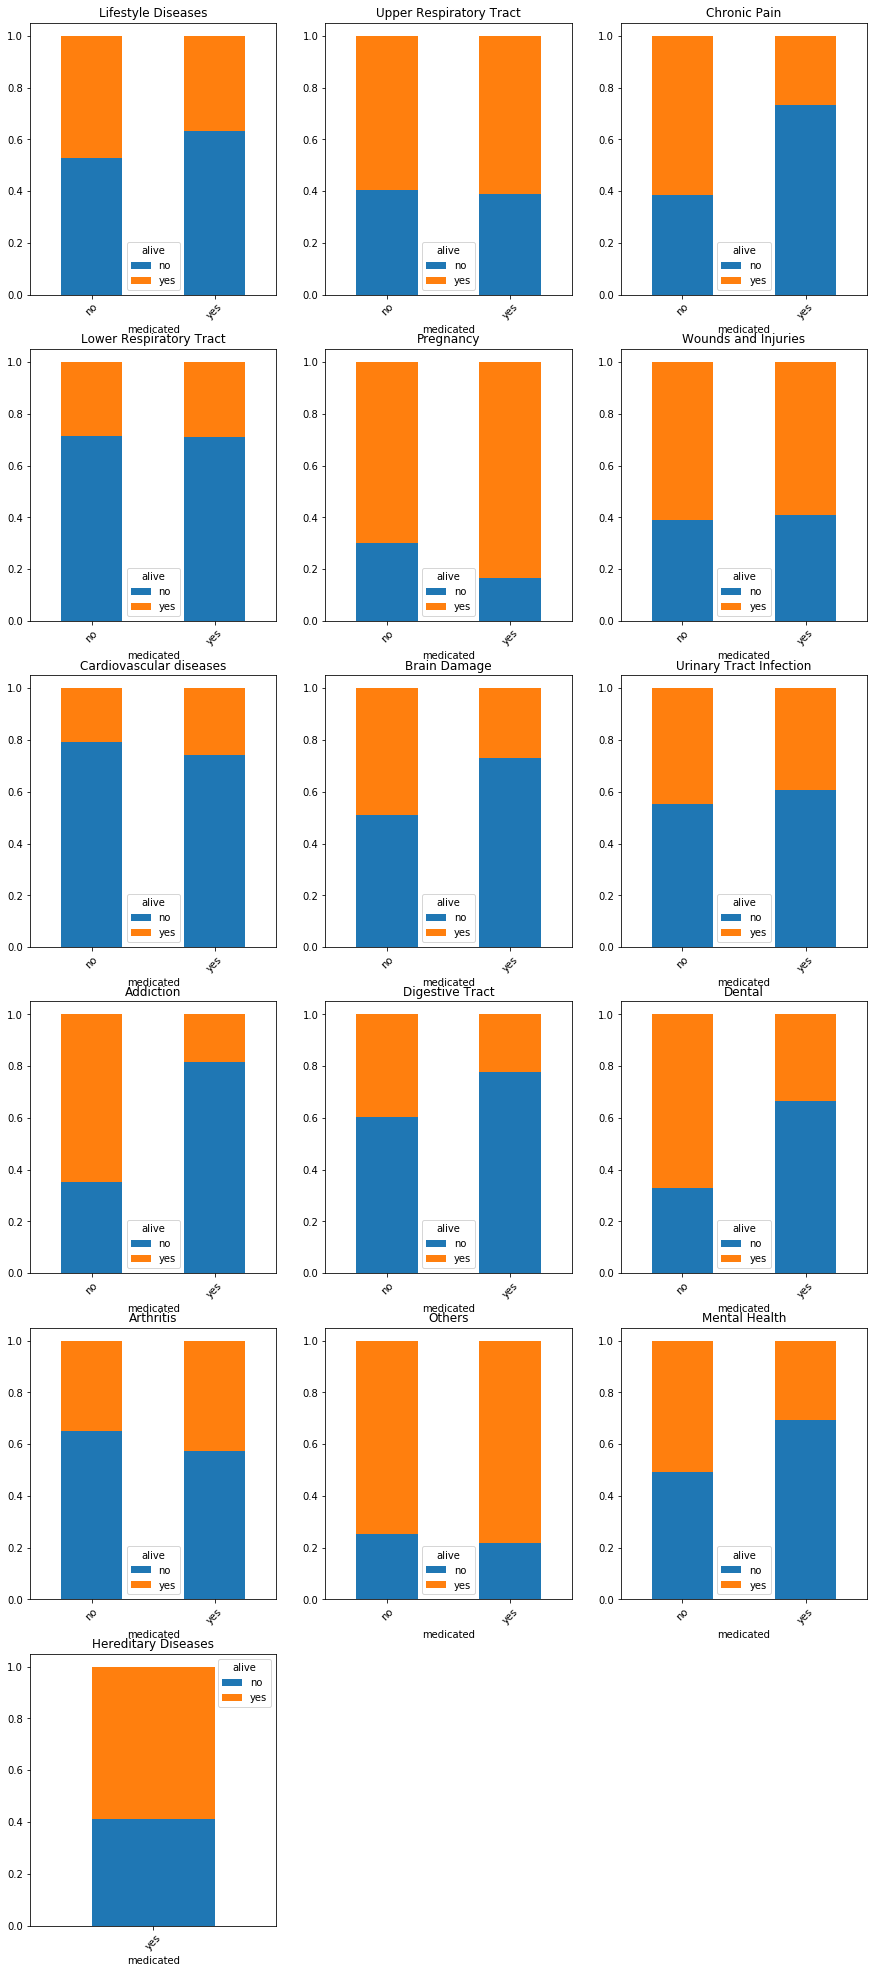

In [117]:
fig,ax = plt.subplots(6,3,figsize = (15,35))
ax = [y for x in ax for y in x]
fig.delaxes(ax[-1])
fig.delaxes(ax[-2])
for i in range(len(all_categories)):
    data = treatment.loc[treatment.condition_category == all_categories[i]]
    pd.crosstab(data.medicated,data.alive,normalize = 'index').plot.bar(stacked = True,ax = ax[i])
    ax[i].set_title(all_categories[i])
    
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

plt.show()
    